# What are we doing here? 
I would like to see if I can get a machine learning model to predict the acceleration due to gravity on Earth. This is a known value that has been validated many times, so I figure it is something that can be easily done. I am going to start by generating random values and inputing them into 

\begin{equation} % to insert extra space between equations, you can leave space between the equation environments. But you should not leave space inside any environment.  
v = v_{o} + at  
\end{equation}  

I will use g as acceleration and plot t vs v which should give me g from the slope of the line.

This is out of sheer curiosity. I have no reason to think this will be useful. Most of the comments have been written as I go in order to document my though process.

## Getting started

In [10]:
# Run this cell if you need to install numpy and matplotlib
!pip install numpy && pip install matplotlib && pip install scipy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Defining velocity function and plotting 

In [28]:
def final_velocity(v_o,t):
    g = -9.8065 # acceleration due to gravity in m/s^2
    v_f = v_o + (g*t)
    return v_f


In [29]:
time = np.random.randint(0,700,10000) # random time values from 0 to 700s and with 10,000 samples
v_o = np.random.randint(0, 343, 10000) # random initial velocity values from 0 to 343 m/s (speed of sound) and 10,000 samples 
v_f = final_velocity(v_o, time)

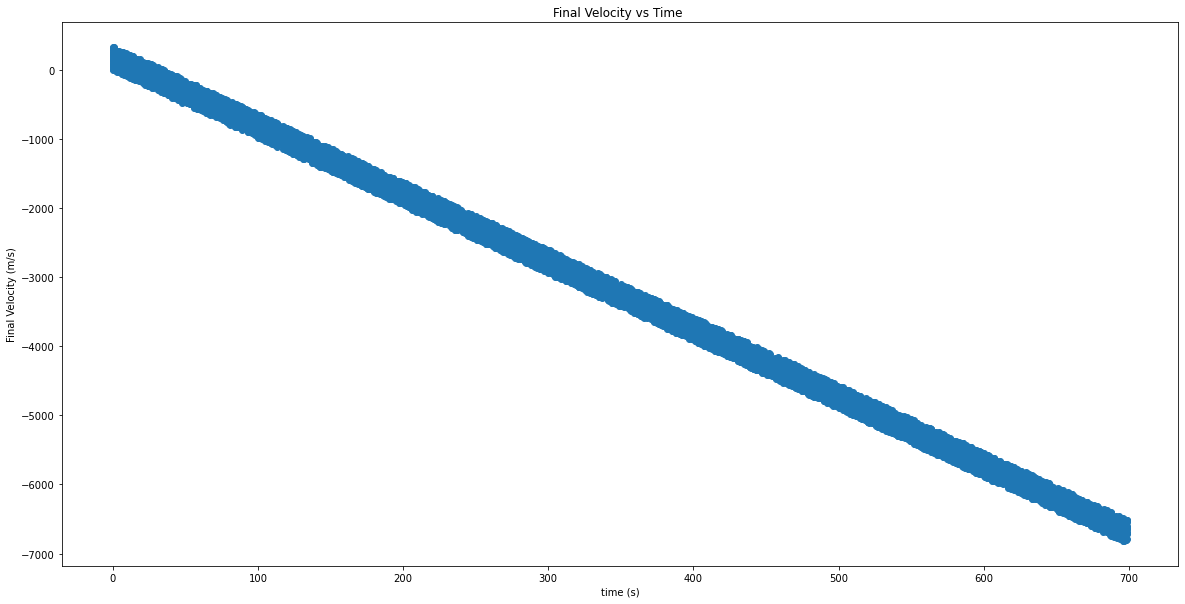

In [30]:
plt.scatter(time, v_f)
plt.xlabel('time (s)')
plt.ylabel('Final Velocity (m/s)')
plt.title('Final Velocity vs Time ')
plt.rcParams['figure.figsize'] = (20,10)

In [31]:
print(linregress(time,v_f)) 

LinregressResult(slope=-9.811421288455291, intercept=171.62572504413674, rvalue=-0.9987627364339451, pvalue=0.0, stderr=0.004885677111373273)


### What do we see?
* The slope of this line comes out to be -9.811 which is very close to our give value of -9.8065, and I suspect it is off due to rounding errors, and not holding the v_o value constant. Let us find out. I am working this out as I go. What happens when we do hold our v_o constant?

In [46]:
v_o = np.full((10000,), 10)

In [47]:
v_f = final_velocity(v_o, time)

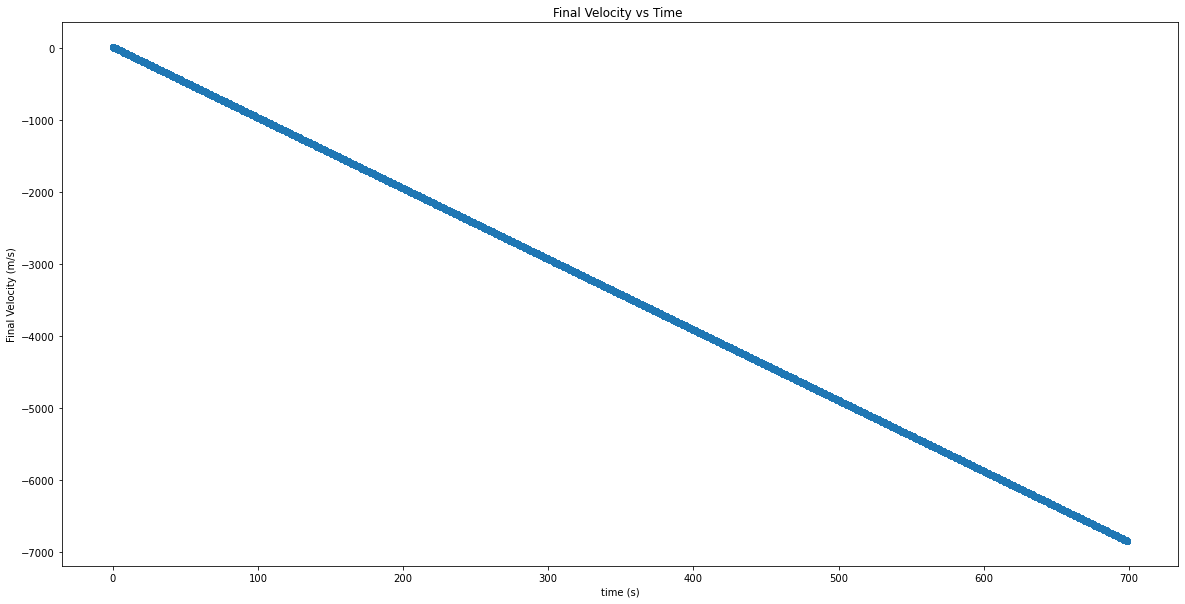

In [50]:
plt.clf()
plt.scatter(time, v_f)
plt.xlabel('time (s)')
plt.ylabel('Final Velocity (m/s)')
plt.title('Final Velocity vs Time ')
plt.rcParams['figure.figsize'] = (20,10)

In [49]:
print(linregress(time,v_f)) 

LinregressResult(slope=-9.80650000000001, intercept=10.000000000004547, rvalue=-1.0, pvalue=0.0, stderr=0.0)


### Now what do we see with a fixed v_o of 10? 
* We see a slope of -9.8065 m/s which is much better than our previous slope of -9.811 when comparing to our give value of g -9.8605. We also see we have a correct intercept of 10 with some decimals due to rounding errors. I suspect the discrepency between the predicted g and given g is also due to rounding errors in python.

# Can a machine learning model do better?
* I know one of the first rules of machine learning is to ask first if you actually need machine learning? Clearly, we do not *need* machine learning here. This is simply an exercise to practice, but lets see what results we come up with anyways.
* Model set up: First we are going to split the data. We need a training and testing set to get model evaluations. I am not sure yet whether I will keep v_o fixed. I want to try it with a random v_o first. From here we will go over model selection, training then testing and plotting results. Maybe instead of doing a normal train/test split here, I will generate a new random number set with a different range of values, since the data is artificially generated anyways? We will see how it goes. 

In [53]:
# Run this to install sklearn and pandas
!pip install -U scikit-learn && pip install pandas

Requirement already up-to-date: scikit-learn in c:\users\nathan\anaconda3\envs\predicting_gravity\lib\site-packages (0.23.2)


# Data Splitting
* We get to skip a lot of the normal data processing steps because we are generating the data ourselves from the equation shown above. We still need to combine the predictors and the targets into one dataframe and then split them into testing and training datasets. 

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [58]:
# were going to make a new  variable v_o_rand which is a random v_o and then use the variable v_o from above
# which was fixed at 10 to try two different models. I suspect the model with a fixed v_o will have a very easy time.
v_o_rand = np.random.randint(0, 343, 10000)
v_f = final_velocity(v_o_rand, time)
all_vals_dict = {'v_o': v_o_rand, 'time':time, 'v_f':v_f}
gravity_df = pd.DataFrame(all_vals_dict)
gravity_df.head() # Let us see what the inital data frame looks like

,v_o,time,v_f
0,41,49,-439.5185
1,263,509,-4728.5085
2,208,413,-3842.0845
3,292,65,-345.4225
4,260,566,-5290.4790


In [60]:
# Now we are going to split between inputs x and outputs y
X = gravity_df[['v_o', 'time']]
Y = gravity_df['v_f']

At this point, we  can do our train test split. I am electing to go with a normal 80/20 split and disregard my though of doing a different rand range for testing. I can validate with more values later. We will see how this goes.

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 97)

## Model Selection and application
* First we must answer, what kind of machine learning question is this? Clearly, this is a regression problem. It's definetly not classification, sequence to sequence, clustering or dimensionality reduction.
* Just by looking at the given equation we can see this is linear regression as well. I suspect the linregress function in scipy is very similar to linear regression models in scikit learn. Does this mean I already applied a model of sorts in the previous section? Probably, but we will continue anyways. 
* We will now apply a linear regression model. 

In [62]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_test, Y_test)

In [64]:
# To find the R^2 value we can use reg.score()
reg.score(X_test, Y_test)

1.0

In [65]:
# It looks like we have a perfect fit. Let's look at the coefficients

In [76]:
coefficients = reg.coef_
variables = ['v_o', 'time']
for k,v in zip(coefficients, variables):
    print(v+ ' coefficient: ', k)


v_o coefficient:  0.9999999999999998
time coefficient:  -9.806499999999998


In [95]:
# We can try another range of values that was outside our original range, just for fun. 

new_rand_v_o = np.random.randint(600,943, 10000) # Choosing new random ranges but with the same difference betwee values
new_time = np.random.randint(1000, 1700, 10000)
new_random_X = np.array([new_rand_v_o, new_time]).T

predicted_vf = reg.predict(new_random_X)
calculated_vf = np.array(final_velocity(new_rand_v_o, new_time))
residuals = predicted_vf-calculated_vf
print(f'''
Mean difference between calculated and predicted %f 
Max difference between calculated and predicted %f
''' % (np.mean(residuals), np.max(residuals)))


Mean difference between calculated and predicted 0.000000 
Max difference between calculated and predicted 0.000000



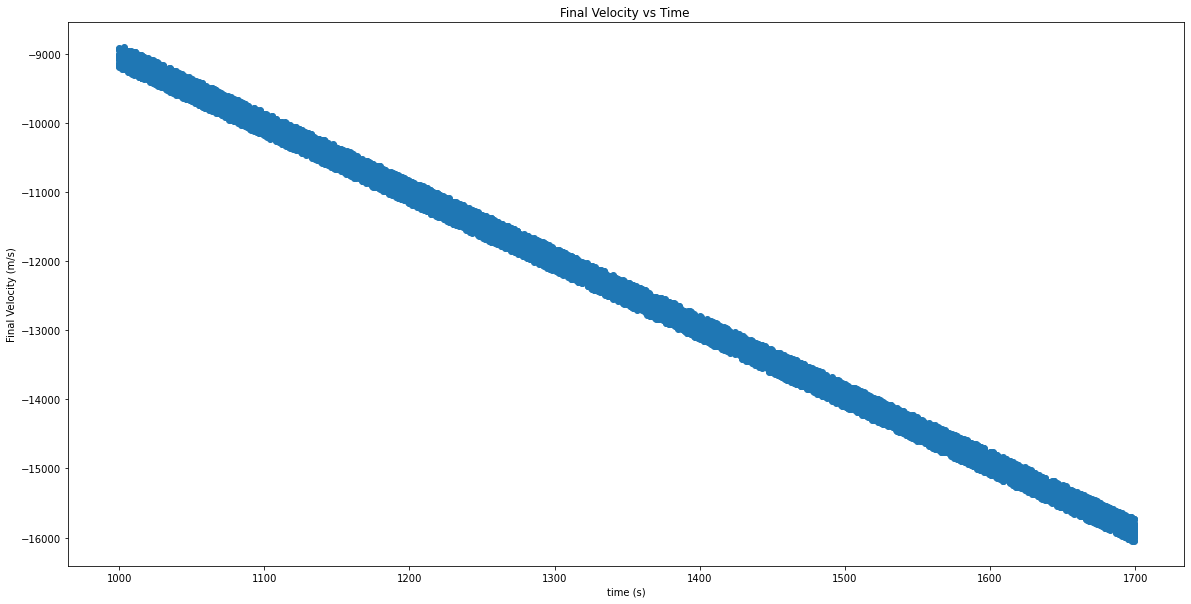

In [96]:
# Lets plot the time vs predicted final velocity so we can visualize it. Remember, this is also with random v_o.
plt.clf()
plt.scatter(new_time, predicted_vf)
plt.xlabel('time (s)')
plt.ylabel('Final Velocity (m/s)')
plt.title('Final Velocity vs Time ')
plt.rcParams['figure.figsize'] = (20,10)

In [97]:
# This looks essentially Identical to the Velocity versus time plot that we initially created with the random v_o. 

## Results
* It looks like we got a perfect R^2 score and the coefficients turned out almost perfectly. The time coefficeint is the same thing as g if you think about the equation, so the value of -9.8065 is exactly the given value, and the v_o coefficient is 1 which is also exactly what it should be. I was a little concerned that the model would create a coefficient other than 1 for v_o which would skew the value of g but it did it's job great. 
* Is this notable for any reason? Well, I guess it depends on your viewpoint. On one hand, we had a very close approximation just from plotting random values with a fixed v_o, so it may not be worth our time to make this model. Also, with any of the given values of v_o, v_f and t a middle school student could calcualte g. Regardless, it is interesting that this came up with a value exactly the same as the given while the plotted time series had more rounding errors. The regression model was clearly able to handle random values for v_o as well and sitll come up with a more correct value than the random v_o plot.
* All in all it was a fun expiriment exploring linear regression!
